<a href="https://www.kaggle.com/code/manthanvarmas/vehicle-price-analysis-and-eda?scriptVersionId=247469954" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

In [2]:
df = pd.read_csv("/kaggle/input/vehicle-price-prediction-dataset/Vehicle Price.csv")
df.head()

,name,description,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,2024 Jeep Wagoneer Series II,"\n \n Heated Leather Seats, Nav Sy...",Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,2024 Jeep Grand Cherokee Laredo,Al West is committed to offering every custome...,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive
2,2024 GMC Yukon XL Denali,NaN,GMC,Yukon XL,2024,96410.0,"6.2L V-8 gasoline direct injection, variable v...",8.0,Gasoline,0.0,Automatic,Denali,SUV,4.0,Summit White,Teak/Light Shale,Four-wheel Drive
3,2023 Dodge Durango Pursuit,White Knuckle Clearcoat 2023 Dodge Durango Pur...,Dodge,Durango,2023,46835.0,16V MPFI OHV,8.0,Gasoline,32.0,8-Speed Automatic,Pursuit,SUV,4.0,White Knuckle Clearcoat,Black,All-wheel Drive
4,2024 RAM 3500 Laramie,\n \n 2024 Ram 3500 Laramie Billet...,RAM,3500,2024,81663.0,24V DDI OHV Turbo Diesel,6.0,Diesel,10.0,6-Speed Automatic,Laramie,Pickup Truck,4.0,Silver,Black,Four-wheel Drive


In [3]:
sns.set(style="whitegrid")

/usr/local/lib/python3.11/dist-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


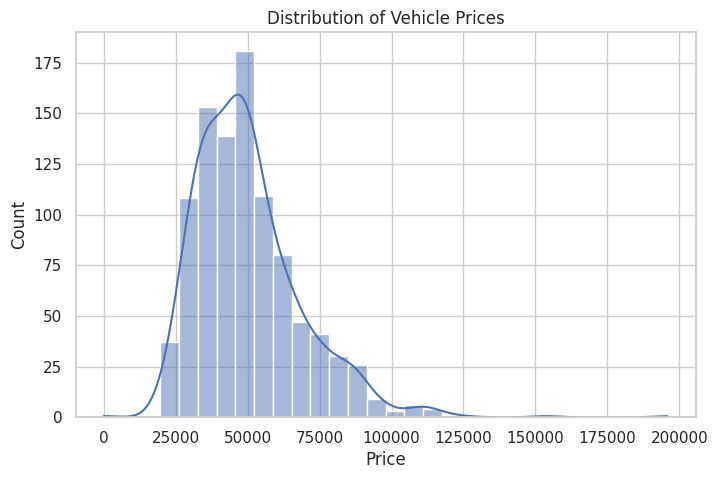

In [4]:
plt.figure(figsize=(8, 5))
sns.histplot(df['price'].dropna(), bins=30, kde=True)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Count')
plt.show()

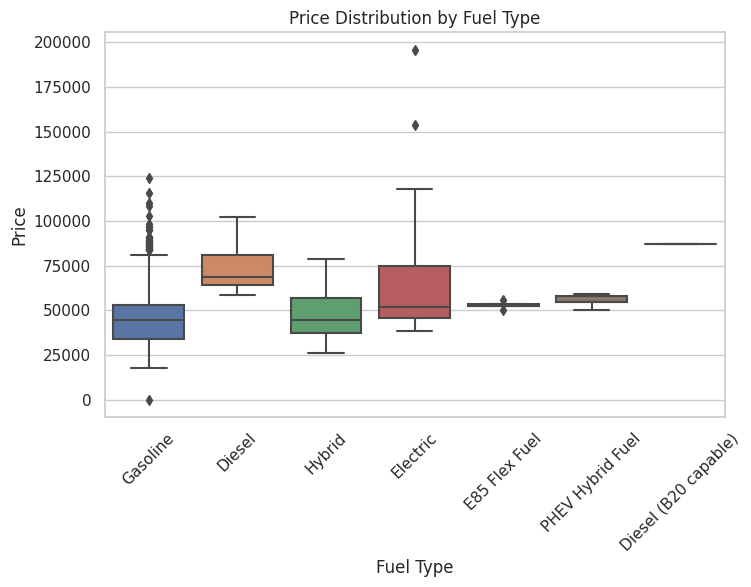

In [5]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='fuel', y='price', data=df)
plt.title('Price Distribution by Fuel Type')
plt.xlabel('Fuel Type')
plt.ylabel('Price')
plt.xticks(rotation=45)
plt.show()

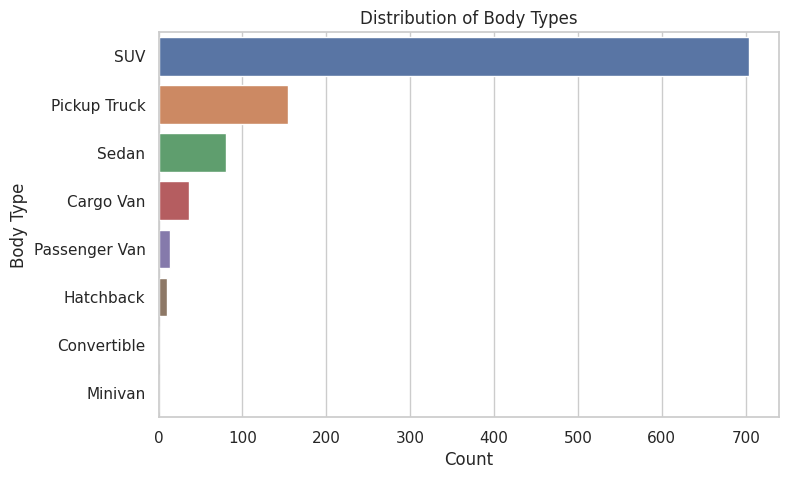

In [6]:
plt.figure(figsize=(8, 5))
sns.countplot(y='body', data=df, order=df['body'].value_counts().index)
plt.title('Distribution of Body Types')
plt.xlabel('Count')
plt.ylabel('Body Type')
plt.show()

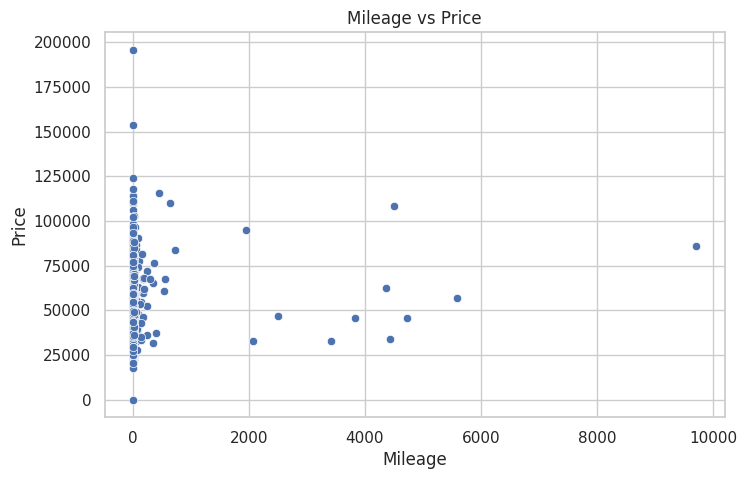

In [7]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x='mileage', y='price', data=df)
plt.title('Mileage vs Price')
plt.xlabel('Mileage')
plt.ylabel('Price')
plt.show()

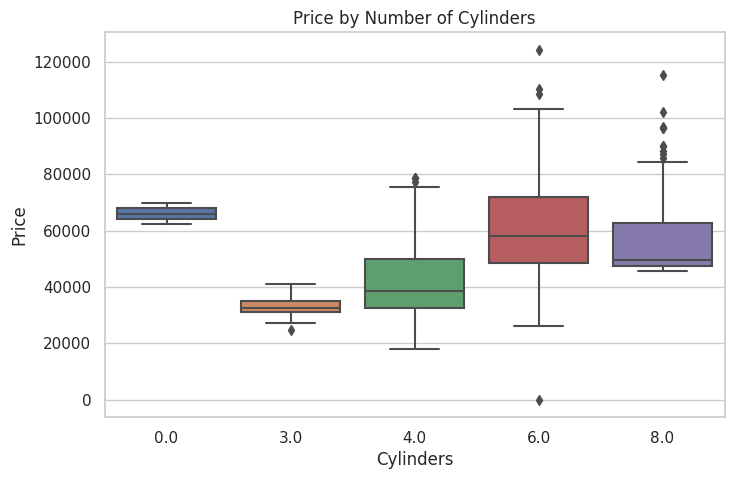

In [8]:
plt.figure(figsize=(8, 5))
sns.boxplot(x='cylinders', y='price', data=df)
plt.title('Price by Number of Cylinders')
plt.xlabel('Cylinders')
plt.ylabel('Price')
plt.show()

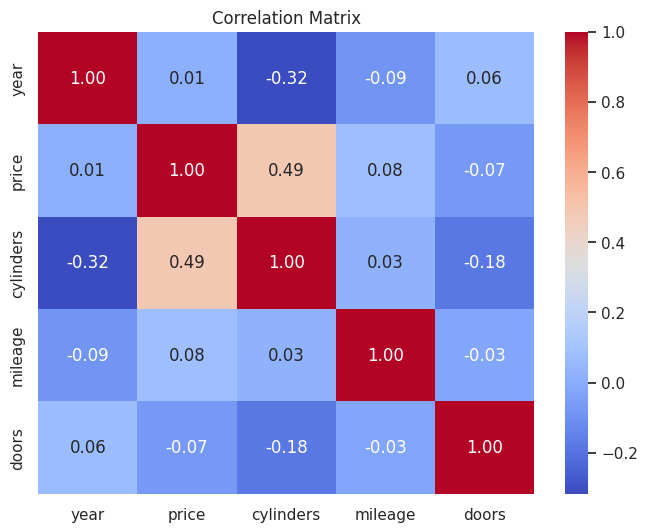

In [9]:
plt.figure(figsize=(8, 6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

In [10]:
missing_values = df.isnull().sum()

In [11]:
df_cleaned = df.dropna(subset=['price'])

numerical_cols = ['cylinders', 'mileage', 'doors']
for col in numerical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())

categorical_cols = ['fuel', 'engine', 'transmission', 'trim', 'body', 'exterior_color', 'interior_color']
for col in categorical_cols:
    df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])

df_cleaned = df_cleaned.drop(columns=['name', 'description'])

df_cleaned = df_cleaned.reset_index(drop=True)

/tmp/ipykernel_13/29273476.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].median())
/tmp/ipykernel_13/29273476.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned[col] = df_cleaned[col].fillna(df_cleaned[col].mode()[0])


In [12]:
df_cleaned.shape, df_cleaned.head()

((979, 15),
     make           model  year    price  \
 0   Jeep        Wagoneer  2024  74600.0   
 1   Jeep  Grand Cherokee  2024  50170.0   
 2    GMC        Yukon XL  2024  96410.0   
 3  Dodge         Durango  2023  46835.0   
 4    RAM            3500  2024  81663.0   
 
                                               engine  cylinders      fuel  \
 0                            24V GDI DOHC Twin Turbo        6.0  Gasoline   
 1                                                OHV        6.0  Gasoline   
 2  6.2L V-8 gasoline direct injection, variable v...        8.0  Gasoline   
 3                                       16V MPFI OHV        8.0  Gasoline   
 4                           24V DDI OHV Turbo Diesel        6.0    Diesel   
 
    mileage       transmission       trim          body  doors  \
 0     10.0  8-Speed Automatic  Series II           SUV    4.0   
 1      1.0  8-Speed Automatic     Laredo           SUV    4.0   
 2      0.0          Automatic     Denali           SU

In [13]:
X = df_cleaned.drop(columns=['price'])
y = df_cleaned['price']

In [14]:
categorical_features = X.select_dtypes(include=['object']).columns.tolist()
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()

preprocessor = ColumnTransformer([
    ('onehot', OneHotEncoder(handle_unknown='ignore'), categorical_features)
], remainder='passthrough')

pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [16]:
pipeline.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehot',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['make', 'model', 'engine',
                                                   'fuel', 'transmission',
                                                   'trim', 'body',
                                                   'exterior_color',
                                                   'interior_color',
                                                   'drivetrain'])])),
                ('regressor', LinearRegression())])

In [17]:
y_pred = pipeline.predict(X_test)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

In [18]:
print("MAE:", mae)
print("RMSE:", rmse)
print("R2 Score:", r2)

MAE: 4640.986540163953
RMSE: 7654.027115590919
R2 Score: 0.8081664137999153
